# Parkinson's data exploration

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import soundfile
import torchcodec
import IPython.display as ipd
import librosa
import librosa.display

from datasets import load_dataset, Audio

## Dataset exploration

#### Loading the dataset from huggingface

In [3]:
#Loading huggingface birgermoell/Italian_Parkinsons_Voice_and_Speech dataset
ds = load_dataset("birgermoell/Italian_Parkinsons_Voice_and_Speech")
ds

DatasetDict({
    train: Dataset({
        features: ['audio'],
        num_rows: 1662
    })
})

Possible requirements for the dataset:
- pip install datasets
- pip install soundfiles
- brew install ffmpeg
- pip install torchcodec
- pip install librosa

In [4]:
#1st file
ds['train'][0]

{'audio': <datasets.features._torchcodec.AudioDecoder at 0x105b5fbb0>}

In [5]:
#1st audio
audio_0 = ds['train'][0]['audio']
audio_0

In [16]:
#3rd audio
audio_2 = ds['train'][2]['audio']
audio_2

This is a lazy decoder object from torchcodec. Audio is not loaded yet.

#### Play an audio file

In [6]:
#Playing the 1st audio file with IPython display

print(f"Sample rate: {audio_0['sampling_rate']} Hz")
ipd.Audio(audio_0["array"], rate=audio_0["sampling_rate"])

Sample rate: 16000 Hz


In [15]:
#Playing the 3rd audio file with IPython display

print(f"Sample rate: {audio_2['sampling_rate']} Hz")
ipd.Audio(audio_2["array"], rate=audio_2["sampling_rate"])

Sample rate: 16000 Hz


In [7]:
audio_0['array']

array([0.        , 0.        , 0.        , ..., 0.0039978 , 0.00350952,
       0.00344849], dtype=float32)

#### Visualize waveform

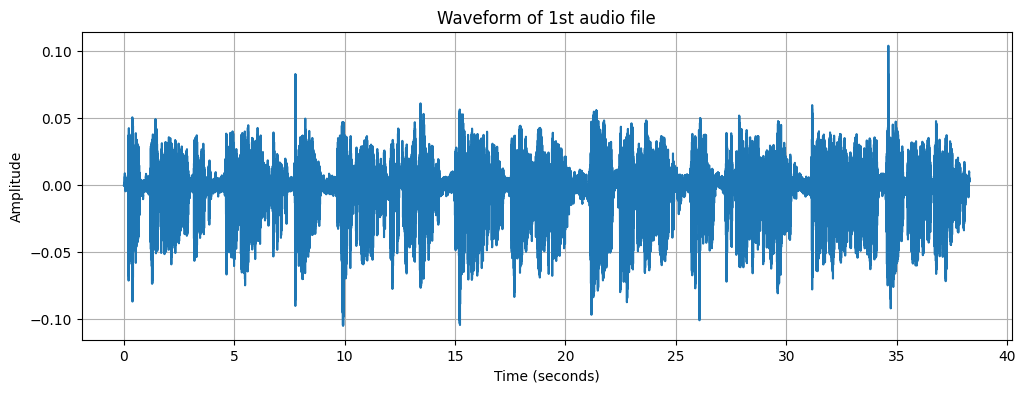

In [13]:
# Extract audio data and sampling rate
waveform = audio_0["array"]
sample_rate = audio_0["sampling_rate"]

# Create time axis in seconds
time_axis = [i / sample_rate for i in range(len(waveform))]

# Plot the waveform
plt.figure(figsize=(12, 4))  # Set the size of the plot
plt.plot(time_axis, waveform)
plt.title("Waveform of 1st audio file")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)